HW 9

Part 1:

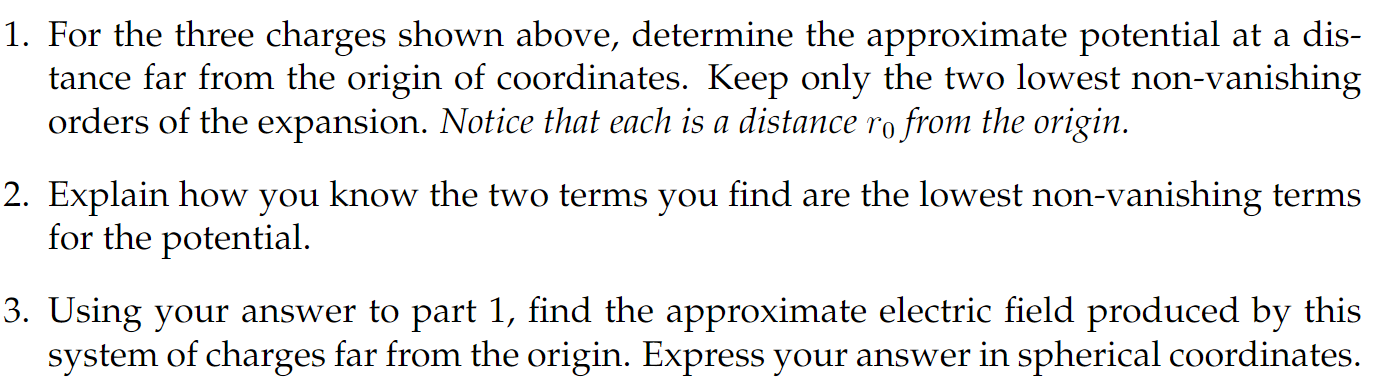

1. Using the far-from-origin equations

$$
V_{mon}(r) = \frac{1}{4\pi \epsilon_0} \frac{Q}{|r|} \\
V_{dip}(r) = \frac{1}{4\pi \epsilon_0} \frac{\vec p \cdot \hat r}{|r|^2} \\
V_{quad} = \dots \\
Q = \sum_i q_i = q\\
\vec p = \sum_i \vec{r_i}' q_i = q r_0 \hat z
$$
Note that $\vec p \cdot \hat r$ is just the portion of $\vec p$ pointing in the same direction as $r$. We only conisder the two lowest non-vanishing terms.

$$
V(r) = \frac{1}{4\pi \epsilon_0} \frac{q}{|r|} + \frac{q r_0 \hat z \cdot \hat r}{|r|^2} \\

$$


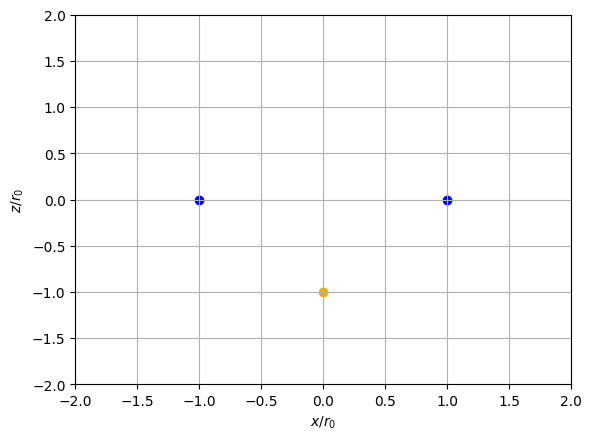

In [41]:
import matplotlib.pyplot as plt

plt.scatter([-1, 1], [0, 0], color='blue')
plt.scatter([0], [-1], color='orange')
#plt.scatter(0, 0, color='black')
plt.xlabel(r'$x/r_0$')
plt.ylabel(r'$z/r_0$')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()

2. Higher order terms

Higher order terms decay at a much faster rate, $\propto \frac{1}{r^3}$ or higher, so far from the origin these effects are very limited, especially compared to the monopole term

3. Electric field - spherical coordinates

First take the gradient of voltage

$$
\nabla = \hat r \frac{\partial}{\partial r} + \hat \theta \frac{1}{r} \frac{\partial}{\partial \theta} + \hat \phi \frac{1}{r \sin \theta}\frac{\partial}{\partial \phi}
$$

To apply this gradient, we need voltage in spherical coorinates. Note that neither term has an azimuthal component

$$
\hat z \cdot \hat r = \cos \theta \\
V(r, \phi) = \frac{q}{4\pi \epsilon_0} \left[\frac{1}{|r|} + \frac{ \cos \theta}{|r|^2} \right] $$
I'm dropping the $||$ for ease of reading/typing
$$
\nabla V(r,\phi) = \frac{q}{4\pi \epsilon_0} \left[
    \hat r \left(-\frac{1}{r^2} - \frac{2\cos\theta}{r^3} \right) 
    - \hat \theta \frac{1}{r} \frac{-\sin \theta}{r^2}
    \right] \\
= -\hat r \frac{q}{4\pi \epsilon_0} \frac{r-2\cos\theta}{r^3} + \hat \theta \frac{q}{4\pi \epsilon_0}\frac{\sin \theta}{r^3}
$$

This gives us our electric field

$$
E = -\nabla V = \hat r \frac{q}{4\pi \epsilon_0} \frac{r-2\cos\theta}{r^3} - \hat \theta \frac{q}{4\pi \epsilon_0}\frac{\sin \theta}{r^3}
$$

This is acually a nice equation, since it helps us visualize how far $r$ must be for the radial component to decay using the $\hat r$ term. The $2\cos \theta$ has a range $(-2, 2)$, so for $|r| >> 2$ there is less and less of an affect from radial position

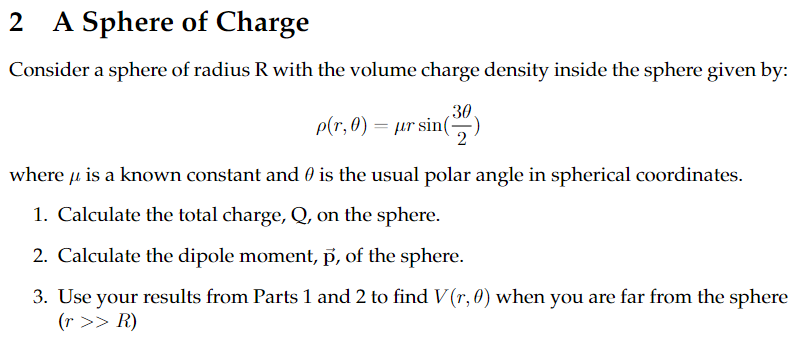

1.
Integral in spherical coorinates:

$$
dv = r^2 \sin \theta dr d\theta d\phi\\
Q = \int_0^{2\pi} \int_0^{\pi} \int_0^R \mu r^3 \sin\left(\frac{3\theta}{2}\right)\sin(\theta) dr d\theta d\phi\\
= 2 \pi \mu \frac{R^4}{4} \int_0^\pi \sin\left(\frac{3\theta}{2}\right) \sin(\theta)d\theta
$$
Lets use a trig identity
$$
2\sin x \sin y = \cos (x-y) - \cos(x+y) \\
\sin\left(\frac{3\theta}{2}\right)\sin(\theta) = \frac{1}{2} \cos\left(\frac{\theta}2 \right) - \frac{1}{2}\cos \left( \frac{5\theta}{2} \right)\\
Q = \pi \mu \frac{R^4}{4} \left[\int_0^\pi \cos\frac{\theta}{2} d\theta - =\int_0^\pi \cos\frac{5\theta}{2}d\theta \right] \\
\pi \mu \frac{R^4}{4} \left[2 - \frac{2}{5}\right] \\
=\pi \mu \frac{2R^4}{5}
$$

2. 
Very similar, just multiply by the vector $\vec r$
$$
p = \int_0^{2\pi} \int_0^{\pi} \int_0^R \vec r \mu r^3 \sin\left(\frac{3\theta}{2}\right)\sin(\theta) dr d\theta d\phi\\
$$

Using $\vec r = r \hat r$, we just need to find the components of $\hat r$
$$
\hat r = \sin \theta \cos \phi \hat x + \sin \theta \sin \phi \hat y + \cos \theta \hat z
$$
We separate our integral out into three parts and solve. Rather than do this all by hand, I'll get some help from sympy

In [40]:
from sympy import *

r, R, theta, phi, mu = symbols('r R theta phi mu')

integrand_x = mu * r**4 * sin(3 * theta / 2) * sin(theta)**2 * cos(phi)
integrand_y = mu * r**4 * sin(3 * theta / 2) * sin(theta)**2 * sin(phi)
integrand_z = mu * r**4 * sin(3 * theta / 2) * sin(theta) * cos(theta)

r_limits = (r, 0, R)
theta_limits = (theta, 0, pi)
phi_limits = (phi, 0, 2 * pi)

p_x = integrate(integrand_x, r_limits, theta_limits, phi_limits)
p_y = integrate(integrand_y, r_limits, theta_limits, phi_limits)
p_z = integrate(integrand_z, r_limits, theta_limits, phi_limits)

display(p_x, p_y, p_z)
#latex(p_z)

0

0

8*pi*R**5*mu/35

As we've seen multiple times in class, the x and y components go to zero. The dipole term is thus

$$\vec p = \pi \mu \frac{8 R^{5}}{35} \hat z$$

For $r >> R$, we have the multipole expansion for voltage as

$$
V(r, \theta) = \frac{\mu R^4}{10\epsilon_0 r} + \frac{2\mu R^5 \cos(\theta)}{35 \epsilon_0 r^2}
$$

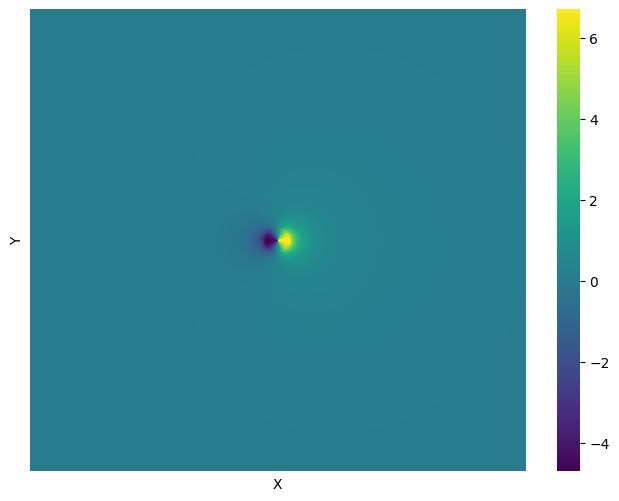

In [91]:
import numpy as np
import seaborn as sns

def V(r, theta, params):
    R, e0, mu = params
    r_capped = np.where(r < 0.1, 0.1, r)
    return mu * R**4/(10*e0*r_capped) + 2*mu*R**5*np.cos(theta)/(35*e0*r_capped**2)

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

params = [1, 1, 1]
voltage = V(R, Theta, params)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(voltage, xticklabels=False, yticklabels=False, cmap="viridis")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Not exactly a beautiful plot. 

3. Python

ak_dipole_anim.ipynb